<a href="https://colab.research.google.com/github/simhachalammaradana/ml-labs/blob/main/ML_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-Nearest Neighbor(KNN) Algorithm**

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.

* K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

* K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.

* K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.

* It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

* KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.

**Example:** Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.

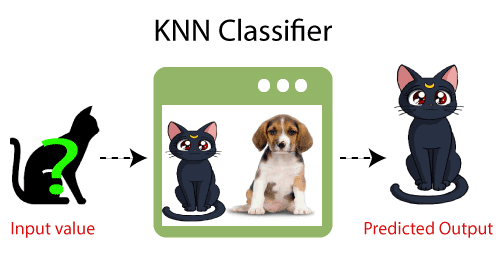

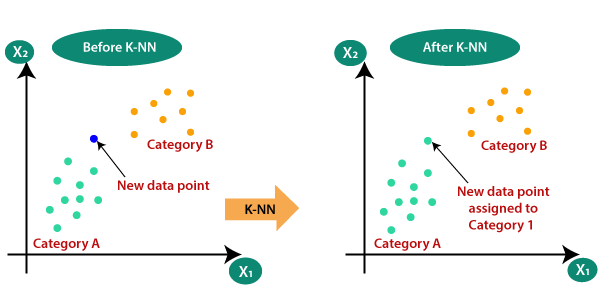

**8.Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/Iris_Lab8.csv')  # Assuming you have saved the dataset as 'iris.csv'

# Split the data into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one (features)
y = data.iloc[:, -1]   # Last column (target - species)

# Encode the species labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the k-Nearest Neighbors classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Decode the predictions and actual values back to their species names
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Print correct and wrong predictions
print("\nCorrect Predictions:")
for i in range(len(y_test)):
    if y_test_labels[i] == y_pred_labels[i]:
        print(f"Predicted: {y_pred_labels[i]}    Actual: {y_test_labels[i]}")

print("\nWrong Predictions:")
for i in range(len(y_test)):
    if y_test_labels[i] != y_pred_labels[i]:
        print(f"Predicted: {y_pred_labels[i]}    Actual: {y_test_labels[i]}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))




FileNotFoundError: [Errno 2] No such file or directory: '/content/Iris_Lab8.csv'

In [ ]:
 #Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
species = label_encoder.classes_

# Simplified Confusion Matrix Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=species, yticklabels=species)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.tight_layout()
plt.show()

# Simple Scatter Plot to visualize feature distribution by species
plt.figure(figsize=(12, 6))
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

for i, species_name in enumerate(label_encoder.classes_):
    plt.scatter(X[y == species_name].iloc[:, 0], X[y == species_name].iloc[:, 1],
                color=colors[i], marker=markers[i], label=species_name, alpha=0.7)

plt.title('Scatter Plot of Iris Features')
plt.xlabel(X.columns[0])  # First feature
plt.ylabel(X.columns[1])  # Second feature
plt.legend()
plt.grid()
plt.show()